In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [24]:
dataset = pd.read_csv('Ecommerce Customers')

In [25]:
dataset.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [26]:
dataset.shape

(500, 8)

In [27]:
dataset.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


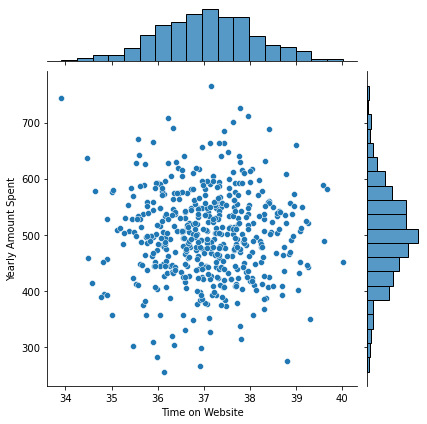

In [29]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=dataset)

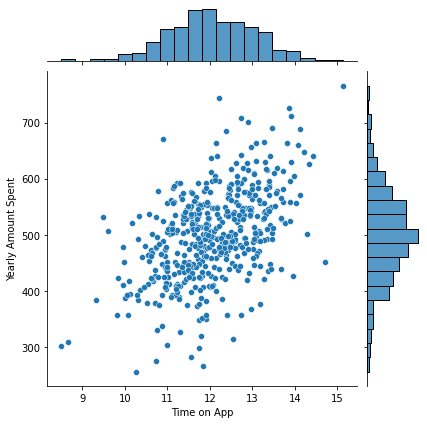

In [30]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data= dataset)

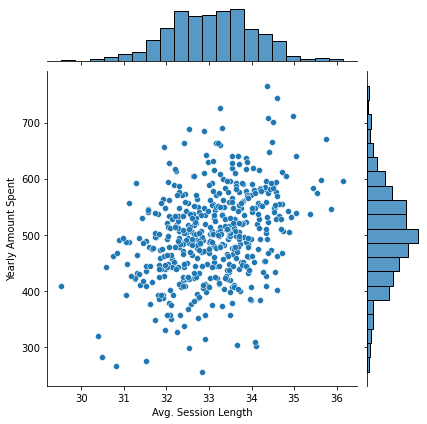

In [31]:
sns.jointplot(x='Avg. Session Length',y='Yearly Amount Spent',data= dataset)

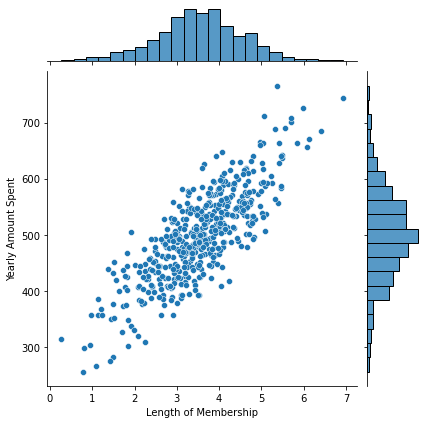

In [32]:
sns.jointplot(x='Length of Membership',y='Yearly Amount Spent',data= dataset)

## Length of Membership has the maximum impact on the dependent variable

In [33]:
#Training and Testing data

X = dataset[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = dataset['Yearly Amount Spent']

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [35]:
#Training the Classifier
from sklearn.linear_model import LinearRegression

In [36]:
#create an object/instance from the class LinearRegression'
lm= LinearRegression()

In [37]:
#Fitting our training data to train our classifier
lm.fit(X_train,y_train)

LinearRegression()

In [38]:
lm.coef_

array([25.69083176, 38.68815596,  0.45279908, 61.71050259])

In [39]:
#Predicting the test data
predictions = lm.predict(X_test)

Text(0, 0.5, 'predictions')

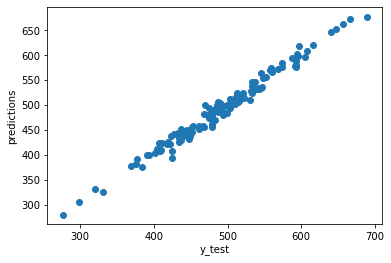

In [40]:
#create a scatterplot to test the actuals with the predictions
plt.scatter(y_test,predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')
#Text(0,0.6,'Predictions')

In [41]:
from sklearn import metrics

In [42]:
print('MSE :-'," ",metrics.mean_squared_error(y_test,predictions))


MSE :-   105.64514296279448


#### Calculating the R2 value to measure the accuracy--

In [43]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predictions)
print(r2)

0.9806693454258993


#### 1. Ridge Regression:

In [44]:
#Importing Ridge
import sklearn
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.001, normalize=True)
#without normalization,we cannot use the coefficients as indicators of feature importance
ridgeReg.fit(X_train,y_train)


Ridge(alpha=0.001, normalize=True)

#### Evaluating using RMSE:

In [45]:
print(np.sqrt(sklearn.metrics.mean_squared_error(y_train, ridgeReg.predict(X_train)))) #MSE of training data
print(np.sqrt(sklearn.metrics.mean_squared_error(y_test, ridgeReg.predict(X_test)))) #MSE of testing data
print('R2 Value/Coefficient of Determination: {}'.format(ridgeReg.score(X_test, y_test)))

9.808344681882634
10.27638403100536
R2 Value/Coefficient of Determination: 0.980676861070679


#### 2. Lasso Regression:

## The alpha value determines how much weight is given to the penalty term. A higher alpha value means that more weight is given to the penalty term, and a lower alpha value means that less weight is given to the penalty term.

### It is necessary to standardize variables before using Lasso and Ridge Regression. Lasso regression puts constraints on the size of the coefficients associated to each variable. However, this value will depend on the magnitude of each variable.

In [ ]:
#Importing Lasso
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001, normalize=True)  # alpha is the penalty term
lassoreg.fit(X_train,y_train)

#### Evaluating using RMSE:

In [ ]:
print(np.sqrt(sklearn.metrics.mean_squared_error(y_train, lassoreg.predict(X_train))))
print(np.sqrt(sklearn.metrics.mean_squared_error(y_test, lassoreg.predict(X_test))))
print('R2 Value/Coefficient of Determination: {}'.format(lassoreg.score(X_test, y_test)))


#### 3. ElasticNet Regression:

In [ ]:
#Importing ElasticNet
from sklearn.linear_model import ElasticNet
Elastic = ElasticNet(alpha=0.001, normalize=True)
Elastic.fit(X_train,y_train)

#### Evaluating using RMSE:

In [ ]:
print(np.sqrt(sklearn.metrics.mean_squared_error(y_train, Elastic.predict(X_train))))
print(np.sqrt(sklearn.metrics.mean_squared_error(y_test, Elastic.predict(X_test))))
print('R2 Value/Coefficient of Determination: {}'.format(Elastic.score(X_test, y_test)))

### If Alpha is close to zero, the Ridge term itself is very small and thus the final error is based on RSS alone. If Alpha is too large, the impact of shrinkage grows and the coefficients B1, B2 ... Bn tends to zero.